In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [13]:
from keras import layers
import keras

In [15]:
df1 = pd.read_csv('/content/features_3_sec.csv')
df1.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [16]:
df1.shape

(9990, 60)

In [17]:
df1.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [18]:
df1 = df1.drop(labels='filename',axis=1)

In [19]:
genre_list = df1.iloc[:, -1]
encoder = LabelEncoder()

In [20]:
y = encoder.fit_transform(genre_list)

In [21]:
print(df1.iloc[:, :-1])

      length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var
0      66149          0.335406  ...    -0.243027   43.771767
1      66149          0.343065  ...     5.784063   59.943081
2      66149          0.346815  ...     2.517375   33.105122
3      66149          0.363639  ...     3.630866   32.023678
4      66149          0.335579  ...     0.536961   29.146694
...      ...               ...  ...          ...         ...
9985   66149          0.349126  ...     1.818823   38.966969
9986   66149          0.372564  ...     0.428857   18.697033
9987   66149          0.347481  ...    -0.299545   41.586990
9988   66149          0.387527  ...     0.675824   12.787750
9989   66149          0.369293  ...    -3.412534   31.727489

[9990 rows x 58 columns]


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
from keras.models import Sequential

In [25]:
# Neural network
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
53/53 [==============================] - 1s 5ms/step - loss: 1.8255 - accuracy: 0.3563
Epoch 2/100
53/53 [==============================] - 0s 4ms/step - loss: 0.9605 - accuracy: 0.6688
Epoch 3/100
53/53 [==============================] - 0s 5ms/step - loss: 0.7209 - accuracy: 0.7593
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 0.5660 - accuracy: 0.8055
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 0.4945 - accuracy: 0.8348
Epoch 6/100
53/53 [==============================] - 0s 5ms/step - loss: 0.4118 - accuracy: 0.8662
Epoch 7/100
53/53 [==============================] - 0s 5ms/step - loss: 0.3733 - accuracy: 0.8823
Epoch 8/100
53/53 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.8971
Epoch 9/100
53/53 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.9181
Epoch 10/100
53/53 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9402
Epoch 11/

In [27]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

26/26 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.8893


In [28]:
print("The test loss is :",test_loss, "\nThe test accuracy is :",test_acc)

The test loss is : 0.5852051973342896 
The test accuracy is : 0.8892933130264282


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               15104     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 56,906
Trainable params: 56,906
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist

,loss,accuracy
0,1.496561,0.474675
1,0.900662,0.688779
2,0.694825,0.769909
3,0.572056,0.808755
4,0.486700,0.836695
...,...,...
95,0.002315,0.999253
96,0.004280,0.998655
97,0.002611,0.999402
98,0.002423,0.999253


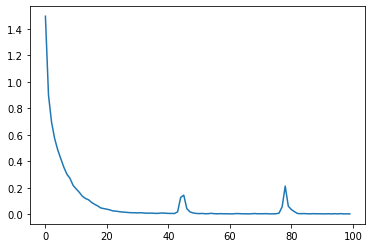

In [33]:
plt.plot(hist['loss'])